# <center> MTCars Weight vs Fuel Efficiency Linear Regression</center># 

### <p style='text-align: left;'> Author: Christopher Gillie </p> <p style='text-align: right;'> 19-Oct-2020 </p> ###

## Introduction: ##

The purpose of this exercise is to implement a simple linear regression on a small dataset. The author chose to implement a linear regression utilizing gradient descent to minimize the mean squared error cost function. The dataset used is the "Motor Trend Car Road Tests" dataset available from R at https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars

The implementation is coded in Python 3.

## Findings: ##
The relationship between the weight of a vehicle and its fuel efficiency can be modeled on the line,
<p style='text-align: center;'> $y=-5.29*x + 37.11$ </p> 

Where $\hspace{.25cm}$
$\begin{cases}
    \text{y = the predicted fuel efficiency of the vehicle in miles per gallon}\\
    \text{x = weight of the vehicle in 1000's of pounds}
\end{cases}$

## Code: ##
### Weight vs MPG of Entire Dataset: ###

In [1]:
#Initialize and Import
"""
Created on Mon Oct 19 8:11:50 EDT 2020

Author: Christopher Gillie
File: MTCars_Linear_Regression.pynb
Description: This code implements a simple linear regression model on the MTCars dataset using
gradient descent as the optimization algorithm minimizing the mean squared error cost function.

"""
#Import libraries
import statsmodels.api as sm
import pandas as pd
import time
import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *
import numpy as np

# Import MTCars from R and make a copy into a Pandas Dataframe
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

print("This code implements a simple linear regression on the wieght vs the fuel efficiency of the MTCars dataset.\
The program uses gradient descent as the optimization algorithm to minimize the mean squared error cost function.")
print('\n')

#Show initial dataframe
print ("Initial dataframe:")
print(df)
print('\n')

This code implements a simple linear regression on the wieght vs the fuel efficiency of the MTCars dataset.The program uses gradient descent as the optimization algorithm to minimize the mean squared error cost function.


Initial dataframe:
                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8 

In [2]:
#Number of vehicles
no_of_cars = float(len(df.index))
print("Number of Vehicles = ",no_of_cars)
print('\n')

#Define the x and y variables
X = df['wt']      #Choose from the following: mpg, cyl, hp, drat, wt, qsec, vs, am, gear, carb
Y = df['mpg']    #Choose from the following: mpg, cyl, hp, drat, wt, qsec, vs, am, gear, carb

print("We are concerned with the following columns:","\n",df[['wt','mpg']])

Number of Vehicles =  32.0


We are concerned with the following columns: 
                         wt   mpg
Mazda RX4            2.620  21.0
Mazda RX4 Wag        2.875  21.0
Datsun 710           2.320  22.8
Hornet 4 Drive       3.215  21.4
Hornet Sportabout    3.440  18.7
Valiant              3.460  18.1
Duster 360           3.570  14.3
Merc 240D            3.190  24.4
Merc 230             3.150  22.8
Merc 280             3.440  19.2
Merc 280C            3.440  17.8
Merc 450SE           4.070  16.4
Merc 450SL           3.730  17.3
Merc 450SLC          3.780  15.2
Cadillac Fleetwood   5.250  10.4
Lincoln Continental  5.424  10.4
Chrysler Imperial    5.345  14.7
Fiat 128             2.200  32.4
Honda Civic          1.615  30.4
Toyota Corolla       1.835  33.9
Toyota Corona        2.465  21.5
Dodge Challenger     3.520  15.5
AMC Javelin          3.435  15.2
Camaro Z28           3.840  13.3
Pontiac Firebird     3.845  19.2
Fiat X1-9            1.935  27.3
Porsche 914-2        2.140  26.0


In [3]:
print ("Computing m and c using gradient descent...")
#Time gradient descent
start_time = time.time()

#Use gradient descent to minimize the mean squared error
#Initialize m, c, r (learning rate), and iterations (number of iterations)
#For wt v mpg initialize with m = -5.340 and c = 37.270
m = -1
c = 30
r = .001
iterations = 25000
n = no_of_cars

# Perform Gradient Descent 
for i in range(iterations): 
    Y_pred = (m*X) + c                     # The current predicted value of Y
    Dm = (-2/n) * sum(X * (Y - Y_pred))    # Derivative wrt m
    Dc = (-2/n) * sum(Y - Y_pred)          # Derivative wrt c
    m = m - (r * Dm)                       # Update m
    c = c - (r * Dc)                       # Update c

comp_time = time.time() - start_time

#Print computed m and c
print ('Computed values of m and c: ',round(m,4),round(c,4))
print("Compute Time:", round(comp_time,4))
print('\n')

Computing m and c using gradient descent...
Computed values of m and c:  -5.2939 37.1089
Compute Time: 18.0019




In [4]:
#Compute R^2
#An excellent R^2 for wt v mpg is 0.75283
top = np.sum((Y-Y_pred)**2)
bottom = np.sum((Y-np.mean(Y))**2)

r_squared_1 = 1-(top/bottom)
print ("R-Squared = ",round(r_squared_1,6))
print('\n')

R-Squared =  0.75276




Text(0.5, 1.0, 'WT v MPG')

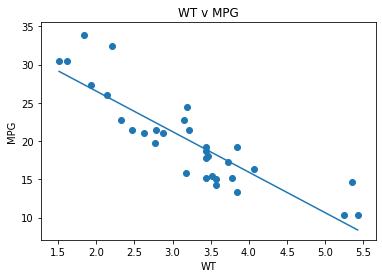

In [5]:
#Write function for line of best fit, plot points and line

#Line of best fit
Y_pred = (m*X)+c

#Plot the best fit line using the endpoints of Y_pred
#The if/else statement ensures that the plotted line \
#matches the behavior of the slope indicated by m
if m<=0:
    point1 = [min(X), max(Y_pred)]
    point2 = [max(X), min(Y_pred)]
    x_values = [point1[0], point2[0]] 
    y_values = [point1[1], point2[1]]

else:
    point1 = [min(X), min(Y_pred)]
    point2 = [max(X), max(Y_pred)]
    x_values = [point1[0], point2[0]] 
    y_values = [point1[1], point2[1]]
    

plot1=plt.figure(1)    
#plot the best fit line
plt.plot(x_values, y_values)

#add the scatter plot of the two variables
plt.scatter(X, Y)

#label plot1
plt.xlabel('WT')
plt.ylabel('MPG')
plt.title('WT v MPG')

Text(0.5, 1.0, 'WT Histogram')

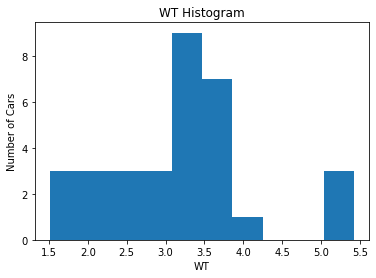

In [6]:
plot2=plt.figure(2)
#Histogram of the X variable
plt.hist(X)

#Label plot
plt.xlabel('WT')
plt.ylabel('Number of Cars')
plt.title('WT Histogram')

Text(0.5, 1.0, 'MPG Histogram')

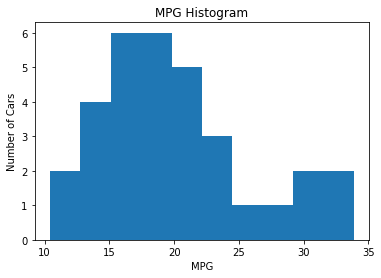

In [7]:
plot3=plt.figure(3)
#Histogram of the Y variable
plt.hist(Y)

#Label plot
plt.xlabel('MPG')
plt.ylabel('Number of Cars')
plt.title('MPG Histogram')

Text(0.5, 1.0, 'Predicted MPG Histogram')

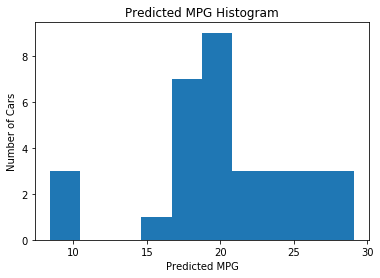

In [8]:
plot4=plt.figure(4)
#Histogram of Y_Pred
plt.hist(Y_pred)

#Label plot
plt.xlabel('Predicted MPG')
plt.ylabel('Number of Cars')
plt.title('Predicted MPG Histogram')

In [9]:
#Show all matplotlib plots
plt.show()

In [10]:
#Plot geom_smooth for LOESS regression
plot5=ggplot(data=df) + \
geom_smooth(mapping=aes(x="wt", y="mpg")) + \
geom_point(mapping=aes(x="wt", y="mpg"))

#plot geom_smooth
#print('Geom Smooth Plot:')
#print (plot5)

In [11]:
#Compare predicted values from regression to actual values
return_df = pd.concat([Y, Y_pred,Y_pred-Y], axis=1)
return_df.columns = ['Actual MPG', 'Predicted MPG','Difference']

#Print review dataframe
print("Review Dataframe with Actual and Predicted MPG")
print('\n')

print(return_df)

Review Dataframe with Actual and Predicted MPG


                     Actual MPG  Predicted MPG  Difference
Mazda RX4                  21.0      23.238990    2.238990
Mazda RX4 Wag              21.0      21.889055    0.889055
Datsun 710                 22.8      24.827148    2.027148
Hornet 4 Drive             21.4      20.089142   -1.310858
Hornet Sportabout          18.7      18.898023    0.198023
Valiant                    18.1      18.792146    0.692146
Duster 360                 14.3      18.209821    3.909821
Merc 240D                  24.4      20.221489   -4.178511
Merc 230                   22.8      20.433243   -2.366757
Merc 280                   19.2      18.898023   -0.301977
Merc 280C                  17.8      18.898023    1.098023
Merc 450SE                 16.4      15.562891   -0.837109
Merc 450SL                 17.3      17.362803    0.062803
Merc 450SLC                15.2      17.098110    1.898110
Cadillac Fleetwood         10.4       9.316134   -1.083866
Lincoln

### Evaluate Possible Outliers: ###

In [12]:
#Evaluate data for possible outliers
print('\n')
print("Now let's evaluate the data for outliers. We will consider points which are at least 2 standard deviations away from the mean.")
print("The Mercedes 240D uses a diesel engine and will therefore be considered an outlier (given the higher power density of diesel).*")
print('\n')



Now let's evaluate the data for outliers. We will consider points which are at least 2 standard deviations away from the mean.
The Mercedes 240D uses a diesel engine and will therefore be considered an outlier (given the higher power density of diesel).*




In [13]:
#Make copy of dataframe
df_no_out = df.copy()

In [14]:
#Checking for outliers by measuring 2 standard deviations from mean

stdx=np.std(X)
stdy=np.std(Y)

meanx=np.mean(X)
meany=np.mean(Y)

print("Standard deviation of X variable =",round(stdx,4))
print("Possible X outliers are above",round(meanx+(2*stdx),2),"or below",round(meanx-(2*stdx),2))
print('\n')

print("Standard deviation of Y variable =",round(stdy,4))
print("Possible Y outliers are above",round(meany+(2*stdy),2), "or below",round(meany-(2*stdy),2))
print('\n')

Standard deviation of X variable = 0.963
Possible X outliers are above 5.14 or below 1.29


Standard deviation of Y variable = 5.932
Possible Y outliers are above 31.95 or below 8.23




In [15]:
#Mark possible outliers in dataframe
df_no_out['Poss_X_Outlier'] = X.apply(lambda x: 1 if x >= meanx+(2*stdx) or x<= meanx-(2*stdx) else 0)
df_no_out['Poss_Y_Outlier'] = Y.apply(lambda x: 1 if x >= meany+(2*stdy) or x<= meany-(2*stdy) else 0) 

#print(df)
print('Possible Outliers Marked in Dataframe')
print(df_no_out)

Possible Outliers Marked in Dataframe
                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280             19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C            17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Me

In [16]:
print("Should all of these vehicles be exlcuded? I would argue that the only vehicle which should be excluded \
is the Mercedes 240D as it is the only diesel powered vehicle of the group.* While others fall outside of \
2 standard deviations from the mean, there is no evidence to suggest that the data are corrupt.")
print('\n')

Should all of these vehicles be exlcuded? I would argue that the only vehicle which should be excluded is the Mercedes 240D as it is the only diesel powered vehicle of the group.* While others fall outside of 2 standard deviations from the mean, there is no evidence to suggest that the data are corrupt.




In [17]:
#Drop possible outliers from dataframe

df_no_out = df_no_out.drop(index='Merc 240D')


yn = input("Do you want to exclude the other vehicles identified? (Y/N): ")
if yn == "Y":
    df_no_out = df_no_out[df_no_out.Poss_X_Outlier != 1]
    df_no_out = df_no_out[df_no_out.Poss_Y_Outlier != 1]

else: 
    print('\n')
    
#If you want to drop those vehicles which are outside of 2 standard deviations without use input, \
#uncomment the following line(s)
#df_no_out = df_no_out[df_no_out.Poss_X_Outlier != 1]
#df_no_out = df_no_out[df_no_out.Poss_Y_Outlier != 1]

print("Dataframe after dropping possible outliers",)
print (df_no_out)
print ('\n')
print("Number of remaining vehicles:",float(len(df_no_out.index)))

Do you want to exclude the other vehicles identified? (Y/N): Y
Dataframe after dropping possible outliers
                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant            18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360         14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 230           22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
Merc 280           19.2    6  167.6  123  3.92  3.440  18.30   1   0     4   
Merc 280C          17.8    6  167.6  123  3.92  3.440  18.90   1   0     4   
Merc 450SE         16.4    8  275.8 

### Weight vs MPG of Dataset Minus Possible Outliers: ###

Now we can run the regression again:
Number of Vehicles =  26.0


Computing m and c using gradient descent...
Computed values of m and c:  -5.6704 37.2145
Compute Time: 17.5597


R-Squared =  0.817653




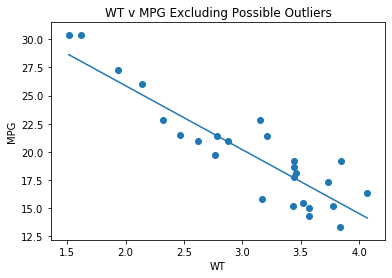

R^2 from first regression: 0.75276 

R^2 from second regression: 0.817653 *
We cannot simply rely on differences in R^2 to justify choosing one model over another.


In [18]:
#The following code is reproduced from the code written above, but this time the code is not \
#broken into cells.
print("Now we can run the regression again:")

#Rewrite df_no_out to df and run regression again
df=df_no_out

#Number of vehicles
no_of_cars = float(len(df.index))
print('\n')

#Define the x and y variables
X = df['wt']     #Choose from the following: mpg, cyl, hp, drat, wt, qsec, vs, am, gear, carb
Y = df['mpg']    #Choose from the following: mpg, cyl, hp, drat, wt, qsec, vs, am, gear, carb

print ("Computing m and c using gradient descent...")
#Time gradient descent
start_time = time.time()

#Use gradient descent to minimize the mean squared error
#Initialize m, c, r (learning rate), and iterations (number of iterations)
#For wt v mpg initialize with m = -5.340 and c = 37.270
m = -1
c = 30
r = .001
iterations = 25000
n = no_of_cars

# Perform Gradient Descent 
for i in range(iterations): 
    Y_pred = (m*X) + c                     # The current predicted value of Y
    Dm = (-2/n) * sum(X * (Y - Y_pred))    # Derivative wrt m
    Dc = (-2/n) * sum(Y - Y_pred)          # Derivative wrt c
    m = m - (r * Dm)                       # Update m
    c = c - (r * Dc)                       # Update c

comp_time = time.time() - start_time

#Print computed m and c
print ('Computed values of m and c: ',round(m,4),round(c,4))
print("Compute Time:", round(comp_time,4))
print('\n')

#Compute R^2
#An excellent R^2 for wt v mpg is 0.75283
top = np.sum((Y-Y_pred)**2)
bottom = np.sum((Y-np.mean(Y))**2)

r_squared_2 = 1-(top/bottom)
print ("R-Squared = ",round(r_squared_2,6))
print('\n')

#Write function for line of best fit, plot points and line

#Line of best fit
Y_pred = (m*X)+c

#Plot the best fit line using the endpoints of Y_pred
#The if/else statement ensures that the plotted line \
#matches the behavior of the slope indicated by m
if m<=0:
    point1 = [min(X), max(Y_pred)]
    point2 = [max(X), min(Y_pred)]
    x_values = [point1[0], point2[0]] 
    y_values = [point1[1], point2[1]]

else:
    point1 = [min(X), min(Y_pred)]
    point2 = [max(X), max(Y_pred)]
    x_values = [point1[0], point2[0]] 
    y_values = [point1[1], point2[1]]
    

plot1=plt.figure(1)    
#plot the best fit line
plt.plot(x_values, y_values)

#add the scatter plot of the two variables
plt.scatter(X, Y)

#label plot1
plt.xlabel('WT')
plt.ylabel('MPG')
plt.title('WT v MPG Excluding Possible Outliers')

plt.show()
round(r_squared_2,6)

print("R^2 from first regression:", round(r_squared_1,6), "\n")
print("R^2 from second regression:", round(r_squared_2,6),"*")

print("We cannot simply rely on differences in R^2 to justify choosing one model over another.")

## Notes: ##


### Alleged Outliers: ###
We identified possible outliers in each variable by finding the respective standard deviation. Points which were more than 2 standard deviations from the mean, were marked, and then those respective vehciles were removed from the dataframe. The Mercedes 240D was also removed since it utilized a deisel engine instead of a gasoline engine.

After removing the alleged outliers and running the regression a second time, we see that the $R^2$ value has increased. Therefore, it might seem that the removal of the alleged outliers is justified. However, aside from the fact that some points are more than 2 standard deviations from the mean, there is little evidence to suggest that these points are in fact outliers. For instance, we have no reason to believe that there was a mistake made when the information was gathered (ie we do not have evidence that the reported mpg figure is wrong). There are also no obvious reasons for excluding a vehicle such as the Toyota Corolla or Lincoln Continental even though the Corolla had very good gas milage and the Continental was exceptionally heavy. The fuel efficiency of the Corolla and the weight of the Continental can be observed across the passenger car segment from 1950-2020.

While there is variation among the precise engine layout of many of the vehicles (inline vs v-shaped or the number of cylinders) there are a few standouts, namely the Mazda RX-4, the Mazda RX-4 Wagon, and the Mercedes 240D. The Mazdas have a rotary engine and the Mercedes uses diesel instead of gasoline. Even with the wildly different engine type, the fuel efficiency of the Mazdas was within 2 standard deviations of the mean. The Mercedes 240D does fall outside of this interval and is ~21% more efficient than expected. This can be explained in part by the power density of diesel, which is ~12% greater than the power density of gas. On average, diesel engines are ~20-30% more efficient than comparable gasoline engines. 

Therefore, the only vehicle which should be considered an outlier is the Mercedes 240D.

### $R^2$: ###

We cannot simply rely on differences in $R^2$ to justify choosing one model over another.

### Dataset Details: ###
mpg	= Miles/(US) gallon
cyl = Number of cylinders
disp = Displacement (cu.in.)
hp = Gross horsepower
drat = Rear axle ratio
wt = Weight (1000 lbs)
qsec = 1/4 mile time
vs = Engine (0 = V-shaped, 1 = straight)
am = Transmission (0 = automatic, 1 = manual)
gear = Number of forward gears

Dataset contains 32 different cars

Note from R Documentation (https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars): Henderson and Velleman (1981) comment in a footnote to Table 1: ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's rotary engine as a straight six-cylinder engine and the Porsche's flat engine as a V engine, as well as the inclusion of the diesel Mercedes 240D, have been retained to enable direct comparisons to be made with previous analyses.’

### Math: ###

$R^2 = 1-\frac{\sum\limits _{i=0} ^{n} (y_i-f_i)^2}{\sum\limits _{i=0} ^{n} (y_i-\bar{y_i})^2}$

$MSE = \frac{1}{n}\sum\limits _{i=0} ^{n} (y_i-\bar{y_i})^2\hspace{1cm}\rightarrow\hspace{1cm}MSE= \frac{1}{n}\sum\limits _{i=0} ^{n} (y_i-(mx_i+c))^2$

We want to minimize the cost function (and need the optimum values for m and c called M and C. Let's take the partial derivative of our cost function with respect to m and then with respect to c. We can then minimize the function by stepping through gradient descent and updating m and c.

$D_m = \frac{1}{n}\sum\limits _{i=0} ^{n} (-2x_i)(y_i-(mx_i+c))\hspace{1cm}\rightarrow\hspace{1cm}D_m=\frac{-2}{n}\sum\limits _{i=0} ^{n} (x_i)(y_i-(mx_i+c))$

$D_c = \frac{1}{n}\sum\limits _{i=0} ^{n}-2(y_i-(mx_i+c))\hspace{1cm}\rightarrow\hspace{1cm}D_c =\frac{-2}{n}\sum\limits _{i=0} ^{n}(y_i-(mx_i+c))$

$M=m^*-(r*D_m)$

$C=c^*-(r*D_c)$